<a href="https://www.kaggle.com/code/pragyamukherjee/dbscan-alzheimer-s-k-means?scriptVersionId=112587244" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("../input/mri-and-alzheimers/oasis_cross-sectional.csv")

In [3]:
data.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [4]:
data.Hand.unique()

array(['R'], dtype=object)

In [5]:
data.drop(["ID","Hand","Delay"],axis=1,inplace=True)

In [6]:
data.columns=["gender","age","education","soc_eco_st","mini_mental_state_exam","clinical_dementia_rating",
           "estimated_total_intracranial_volume","normalize_whole_brain_volume","atlas_scaling_factor"]

In [7]:
data.gender = [1 if each == "F" else 0 for each in  data.gender]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 9 columns):
gender                                 436 non-null int64
age                                    436 non-null int64
education                              235 non-null float64
soc_eco_st                             216 non-null float64
mini_mental_state_exam                 235 non-null float64
clinical_dementia_rating               235 non-null float64
estimated_total_intracranial_volume    436 non-null int64
normalize_whole_brain_volume           436 non-null float64
atlas_scaling_factor                   436 non-null float64
dtypes: float64(6), int64(3)
memory usage: 30.8 KB


In [9]:
data.isnull().sum()

gender                                   0
age                                      0
education                              201
soc_eco_st                             220
mini_mental_state_exam                 201
clinical_dementia_rating               201
estimated_total_intracranial_volume      0
normalize_whole_brain_volume             0
atlas_scaling_factor                     0
dtype: int64

In [10]:
data.describe()

,gender,age,education,soc_eco_st,mini_mental_state_exam,clinical_dementia_rating,estimated_total_intracranial_volume,normalize_whole_brain_volume,atlas_scaling_factor
count,436.000000,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000
mean,0.614679,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894
std,0.487230,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682
min,0.000000,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000
25%,0.000000,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750
50%,1.000000,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000
75%,1.000000,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250
max,1.000000,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000


In [11]:
data.shape

(436, 9)

In [12]:
def impute_median(series):
    return series.fillna(series.median())

In [13]:
data.education =data["education"].transform(impute_median)
data.soc_eco_st =data["soc_eco_st"].transform(impute_median)
data.mini_mental_state_exam =data["mini_mental_state_exam"].transform(impute_median)
data.clinical_dementia_rating =data["clinical_dementia_rating"].transform(impute_median)

In [14]:
data.head()

,gender,age,education,soc_eco_st,mini_mental_state_exam,clinical_dementia_rating,estimated_total_intracranial_volume,normalize_whole_brain_volume,atlas_scaling_factor
0,1,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,1,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,1,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,0,28,3.0,2.0,29.0,0.0,1588,0.803,1.105
4,0,18,3.0,2.0,29.0,0.0,1737,0.848,1.010


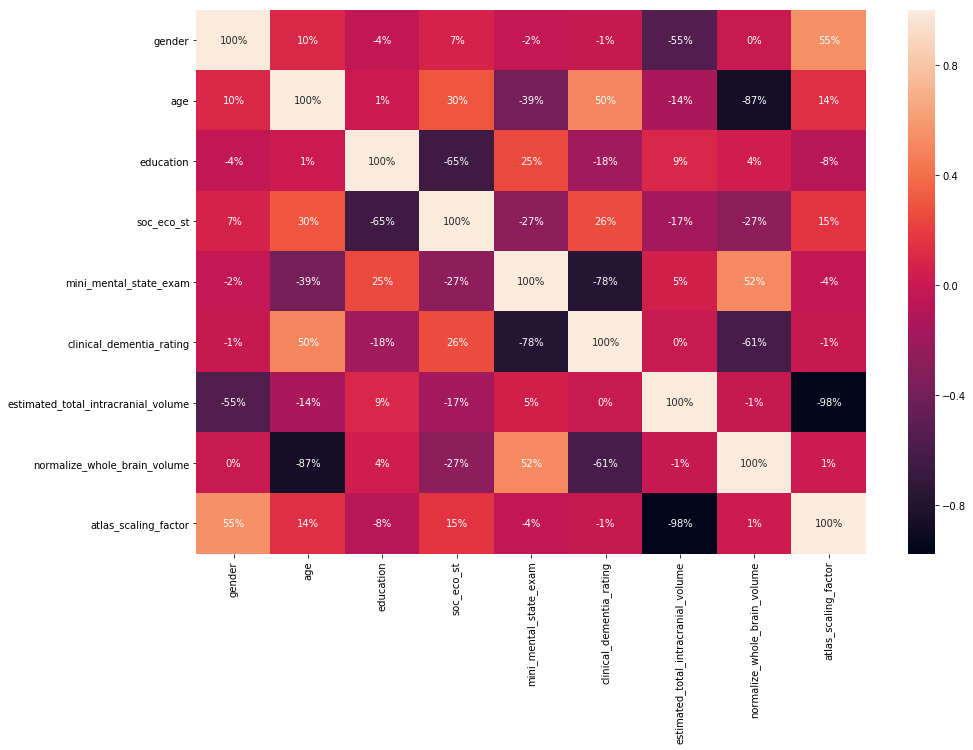

In [15]:
#visualize the correlation
plt.figure(figsize=(15,10))
sns.heatmap(data.iloc[:,0:10].corr(), annot=True,fmt=".0%")
plt.show()

In [16]:
data

,gender,age,education,soc_eco_st,mini_mental_state_exam,clinical_dementia_rating,estimated_total_intracranial_volume,normalize_whole_brain_volume,atlas_scaling_factor
0,1,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,1,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,1,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,0,28,3.0,2.0,29.0,0.0,1588,0.803,1.105
4,0,18,3.0,2.0,29.0,0.0,1737,0.848,1.010
...,...,...,...,...,...,...,...,...,...
431,0,20,3.0,2.0,29.0,0.0,1469,0.847,1.195
432,0,22,3.0,2.0,29.0,0.0,1684,0.790,1.042
433,0,22,3.0,2.0,29.0,0.0,1580,0.856,1.111
434,1,20,3.0,2.0,29.0,0.0,1262,0.861,1.390


In [17]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification

dbscan = DBSCAN(eps=20, min_samples=4)
dbscan.fit(data)

DBSCAN(algorithm='auto', eps=20, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [18]:
import seaborn as sns
from numpy import unique
from sklearn.model_selection import train_test_split
labels = dbscan.labels_
pred = dbscan.fit_predict(data)
pred

#plt.scatter(data= data,x ='age',y = 'normalize_whole_brain_volume',c = pred, cmap='viridis')
#plt.xlabel('age')
#plt.ylabel('clinical_dementia_rating')
#plt.show()



array([ 0, -1,  0,  0,  0, -1,  0,  0,  1,  0,  0,  1,  0,  1,  0,  0,  0,
        0,  0,  3,  0,  0,  2,  2, -1,  0,  0,  0,  0,  1,  0,  0,  0,  2,
        0,  0,  2,  0, -1,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,
        0,  2,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  2,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  2,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  3,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  2,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  1,  0,  0,  0,  0,  2,  0,  0, -1,  2,  0,  0,  0,  0,  0,  0,
       -1,  2,  0,  0,  2,  1,  0,  0,  0, -1,  0,  0,  2,  0,  0, -1,  1,
        0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  2

In [19]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

silhoutteScore = silhouette_score(data,pred, metric='euclidean')
print('Silhoutte Score: %.4f' % silhoutteScore)

calinski_harabasz_score_ = calinski_harabasz_score(data, labels)
print('Calinski Harabasz Score: %.4f' % calinski_harabasz_score_)

davies_bouldin_score_ = davies_bouldin_score(data, labels)
print('Davies Bouldin Score: %.4f' % davies_bouldin_score_)

Silhoutte Score: 0.0731
Calinski Harabasz Score: 51.3667
Davies Bouldin Score: 8.2001
